In [ ]:
from keras.layers import Dropout
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Create a modified ANN model with dropout
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.5))  # Dropout layer with a rate of 0.5
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer with a rate of 0.5
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model with dropout
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=15,
                    validation_data=(x_test, y_test),
                    verbose=1)


Epoch 1/15
469/469 [==============================] - 12s 23ms/step - loss: 0.3478 - accuracy: 0.8929 - val_loss: 0.1262 - val_accuracy: 0.9599
Epoch 2/15
469/469 [==============================] - 12s 26ms/step - loss: 0.1629 - accuracy: 0.9519 - val_loss: 0.0906 - val_accuracy: 0.9710
Epoch 3/15
469/469 [==============================] - 11s 23ms/step - loss: 0.1262 - accuracy: 0.9613 - val_loss: 0.0782 - val_accuracy: 0.9761
Epoch 4/15
469/469 [==============================] - 12s 26ms/step - loss: 0.1074 - accuracy: 0.9670 - val_loss: 0.0754 - val_accuracy: 0.9777
Epoch 5/15
469/469 [==============================] - 10s 21ms/step - loss: 0.0945 - accuracy: 0.9702 - val_loss: 0.0699 - val_accuracy: 0.9781
Epoch 6/15
469/469 [==============================] - 21s 44ms/step - loss: 0.0858 - accuracy: 0.9728 - val_loss: 0.0625 - val_accuracy: 0.9811
Epoch 7/15
469/469 [==============================] - 13s 29ms/step - loss: 0.0795 - accuracy: 0.9747 - val_loss: 0.0629 - val_accuracy:

1/1 [==============================] - 0s 99ms/step


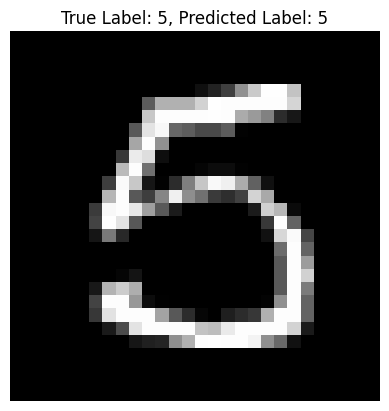

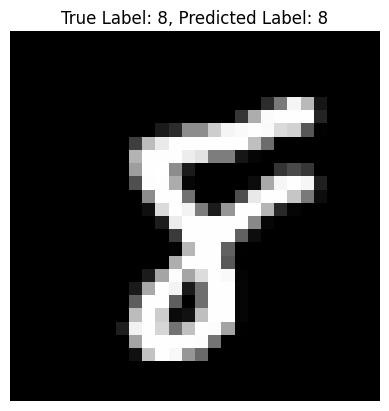

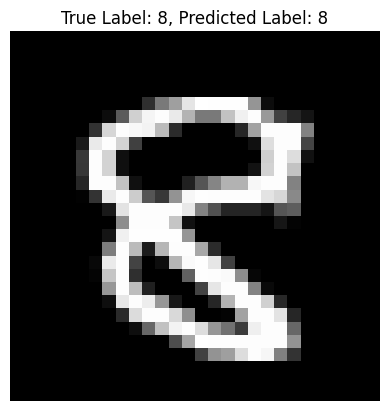

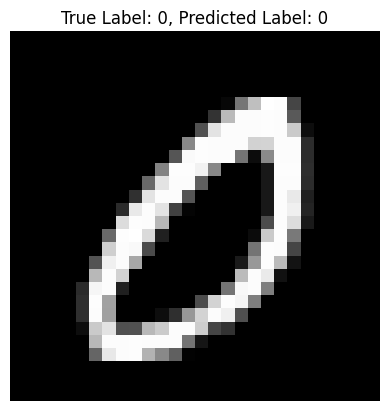

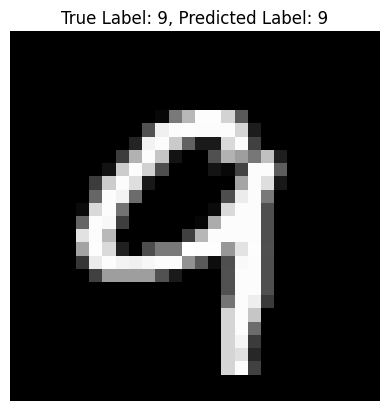

In [ ]:
import matplotlib.pyplot as plt

# Select some random test images
num_images = 5
random_indices = np.random.randint(0, x_test.shape[0], num_images)
test_images = x_test[random_indices]
test_labels = y_test[random_indices]

# Make predictions on the test images
predictions = model.predict(test_images)

# Display the test images and their predicted labels
for i in range(num_images):
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"True Label: {test_labels[i]}, Predicted Label: {np.argmax(predictions[i])}")
    plt.axis('off')
    plt.show()


In [ ]:
predictions = model.predict(test_images)
predictions

1/1 [==============================] - 0s 38ms/step


array([[7.2648842e-13, 6.4151696e-15, 1.3077027e-16, 2.4448203e-09,
        1.5645659e-16, 1.0000000e+00, 3.9091386e-12, 1.1020880e-14,
        1.9119658e-12, 6.6640524e-09],
       [3.7104517e-10, 1.2837747e-08, 1.8421933e-09, 9.5710417e-09,
        2.1545238e-08, 1.4859766e-07, 2.9086600e-09, 2.2547217e-10,
        9.9999952e-01, 2.7815071e-07],
       [2.9738051e-06, 2.3591481e-08, 1.8865861e-06, 1.6308113e-05,
        2.1426285e-07, 8.5304855e-05, 4.9268897e-06, 1.4979784e-09,
        9.9975365e-01, 1.3464039e-04],
       [9.9999988e-01, 1.3165302e-11, 8.2799581e-08, 2.4977896e-13,
        1.5315153e-12, 2.8787108e-11, 4.8955939e-10, 1.5692037e-09,
        1.0866945e-09, 6.6702921e-10],
       [3.5828160e-09, 1.5745143e-12, 5.0450041e-08, 4.1353866e-07,
        4.5485549e-06, 3.0516738e-08, 2.9789066e-12, 5.5042426e-07,
        1.8107961e-09, 9.9999440e-01]], dtype=float32)

313/313 [==============================] - 1s 3ms/step


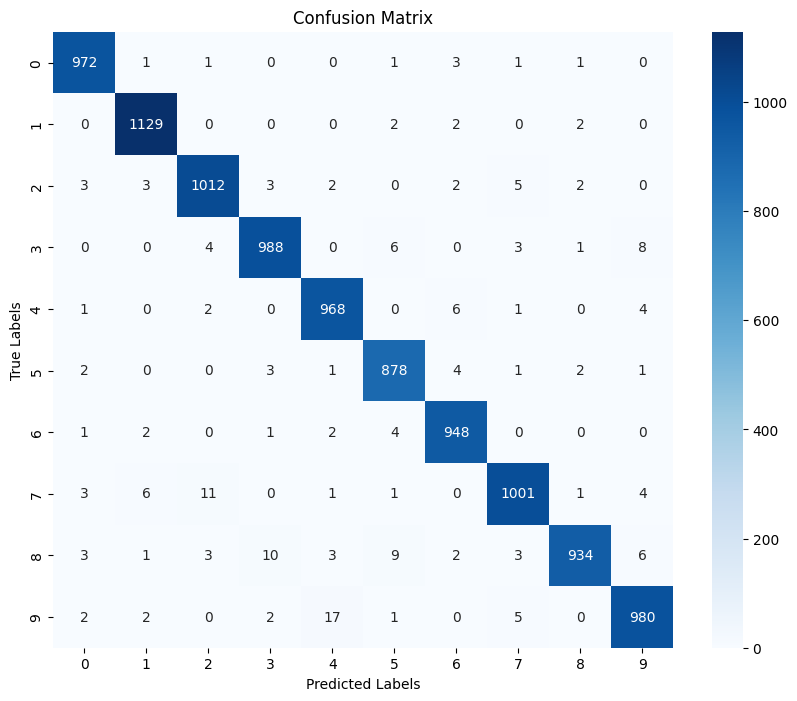

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Make predictions on all test data
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

# Create a confusion matrix
cm = confusion_matrix(y_test, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
